Epoch 1, Loss: 0.2003, Accuracy: 96.59%
Epoch 2, Loss: 0.0852, Accuracy: 97.57%
Epoch 3, Loss: 0.0551, Accuracy: 98.32%
Epoch 4, Loss: 0.0370, Accuracy: 98.65%
Epoch 5, Loss: 0.0249, Accuracy: 98.86%
Epoch 6, Loss: 0.0170, Accuracy: 98.95%
Epoch 7, Loss: 0.0114, Accuracy: 99.34%
Epoch 8, Loss: 0.0083, Accuracy: 99.52%
Epoch 9, Loss: 0.0061, Accuracy: 99.62%
Epoch 10, Loss: 0.0041, Accuracy: 99.75%
Epoch 11, Loss: 0.0030, Accuracy: 99.87%
Epoch 12, Loss: 0.0022, Accuracy: 99.92%
Epoch 13, Loss: 0.0017, Accuracy: 99.95%
Epoch 14, Loss: 0.0014, Accuracy: 99.96%
Epoch 15, Loss: 0.0013, Accuracy: 99.97%
Epoch 16, Loss: 0.0011, Accuracy: 99.99%
Epoch 17, Loss: 0.0010, Accuracy: 99.99%
Epoch 18, Loss: 0.0009, Accuracy: 100.00%
Epoch 19, Loss: 0.0008, Accuracy: 100.00%
Epoch 20, Loss: 0.0007, Accuracy: 100.00%
Epoch 21, Loss: 0.0007, Accuracy: 100.00%
Epoch 22, Loss: 0.0006, Accuracy: 100.00%
Epoch 23, Loss: 0.0006, Accuracy: 100.00%
Epoch 24, Loss: 0.0006, Accuracy: 100.00%
Epoch 25, Loss: 0.

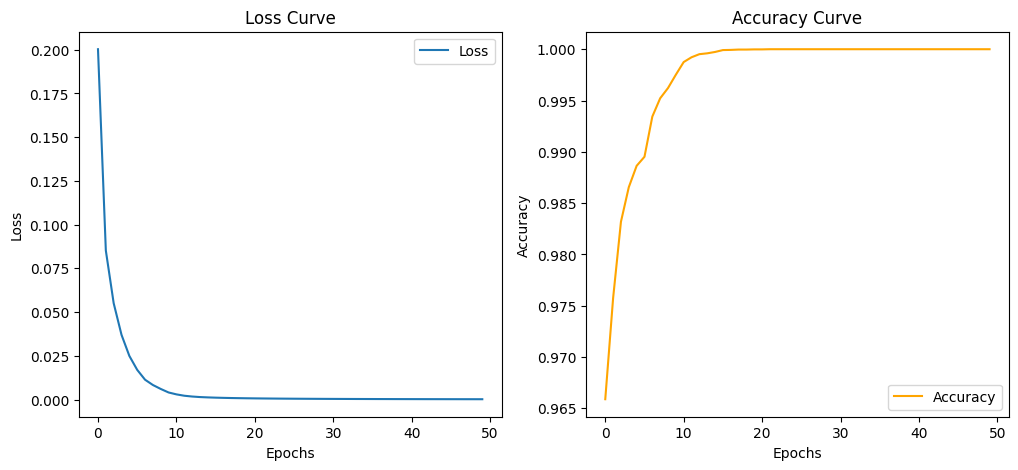

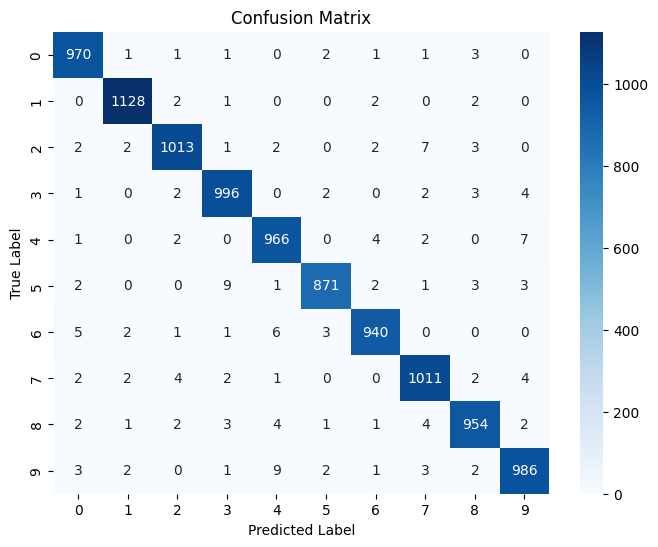

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape input data (flattening 28x28 images into 784-dimensional vectors)
x_train = x_train.reshape(-1, 784).astype(np.float32)
x_test = x_test.reshape(-1, 784).astype(np.float32)

# Convert labels to one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Define network parameters
input_size = 784
hidden_size = 256
output_size = 10
learning_rate = 0.1
epochs = 50
batch_size = 10

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([input_size, hidden_size], stddev=0.1))
b1 = tf.Variable(tf.zeros([hidden_size]))
W2 = tf.Variable(tf.random.normal([hidden_size, output_size], stddev=0.1))
b2 = tf.Variable(tf.zeros([output_size]))

def forward_pass(x):
    hidden = tf.nn.relu(tf.matmul(x, W1) + b1)
    output = tf.matmul(hidden, W2) + b2
    return output

def compute_loss(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        logits = forward_pass(x_batch)
        loss = compute_loss(logits, y_batch)
    gradients = tape.gradient(loss, [W1, b1, W2, b2])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
    return loss

# Training loop
num_batches = x_train.shape[0] // batch_size
loss_curve = []
accuracy_curve = []
start_time = time.time()

for epoch in range(epochs):
    avg_loss = 0
    for i in range(num_batches):
        batch_x = x_train[i * batch_size:(i + 1) * batch_size]
        batch_y = y_train[i * batch_size:(i + 1) * batch_size]
        loss = train_step(batch_x, batch_y)
        avg_loss += loss / num_batches
    loss_curve.append(avg_loss.numpy())
    
    logits_train = forward_pass(x_train)
    predictions_train = tf.argmax(logits_train, axis=1)
    y_train_true = tf.argmax(y_train, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions_train, y_train_true), tf.float32))
    accuracy_curve.append(accuracy.numpy())
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy.numpy() * 100:.2f}%")

end_time = time.time()
training_time = end_time - start_time

# Evaluate model
logits_test = forward_pass(x_test)
predictions = tf.argmax(logits_test, axis=1)
y_true = tf.argmax(y_test, axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_true), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_curve, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_curve, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Epoch 1, Loss: 0.2150, Accuracy: 95.94%
Epoch 2, Loss: 0.0968, Accuracy: 96.89%
Epoch 3, Loss: 0.0670, Accuracy: 97.60%
Epoch 4, Loss: 0.0489, Accuracy: 98.05%
Epoch 5, Loss: 0.0359, Accuracy: 98.32%
Epoch 6, Loss: 0.0270, Accuracy: 98.57%
Epoch 7, Loss: 0.0209, Accuracy: 98.77%
Epoch 8, Loss: 0.0156, Accuracy: 98.70%
Epoch 9, Loss: 0.0122, Accuracy: 98.97%
Epoch 10, Loss: 0.0093, Accuracy: 98.95%
Epoch 11, Loss: 0.0075, Accuracy: 99.37%
Epoch 12, Loss: 0.0051, Accuracy: 99.57%
Epoch 13, Loss: 0.0042, Accuracy: 99.59%
Epoch 14, Loss: 0.0032, Accuracy: 99.77%
Epoch 15, Loss: 0.0023, Accuracy: 99.81%
Epoch 16, Loss: 0.0016, Accuracy: 99.89%
Epoch 17, Loss: 0.0013, Accuracy: 99.94%
Epoch 18, Loss: 0.0011, Accuracy: 99.97%
Epoch 19, Loss: 0.0010, Accuracy: 99.98%
Epoch 20, Loss: 0.0009, Accuracy: 99.99%
Epoch 21, Loss: 0.0008, Accuracy: 100.00%
Epoch 22, Loss: 0.0007, Accuracy: 100.00%
Epoch 23, Loss: 0.0007, Accuracy: 100.00%
Epoch 24, Loss: 0.0006, Accuracy: 100.00%
Epoch 25, Loss: 0.000

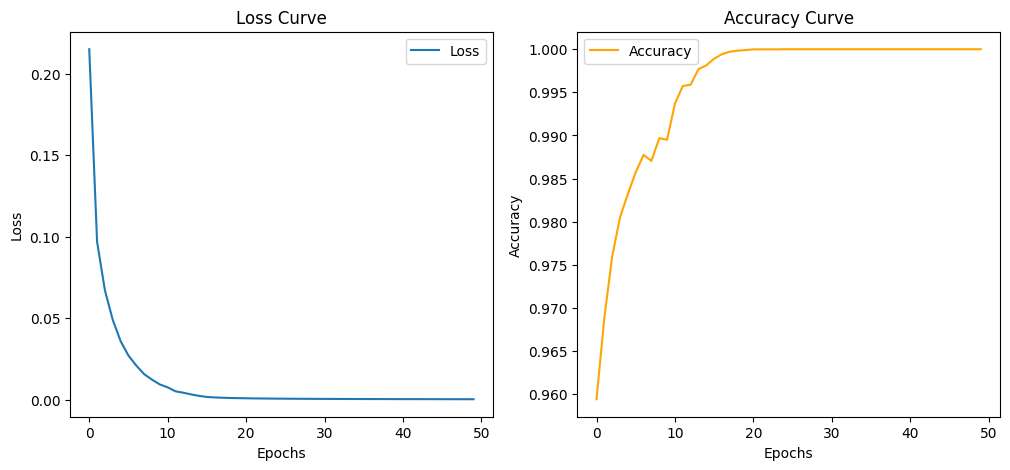

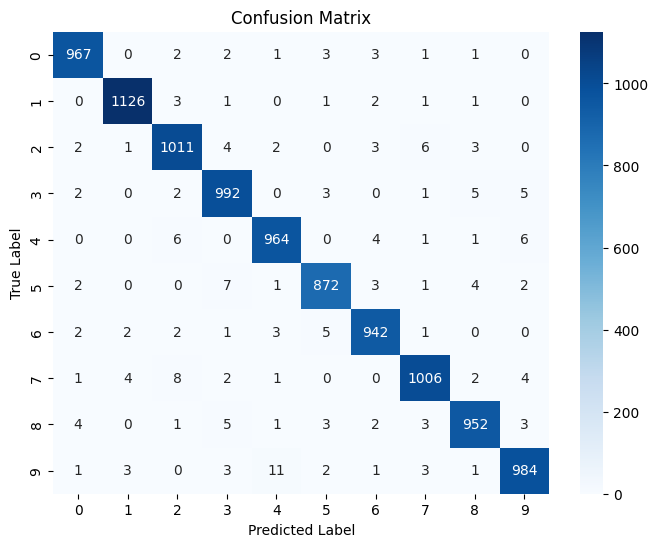

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape input data (flattening 28x28 images into 784-dimensional vectors)
x_train = x_train.reshape(-1, 784).astype(np.float32)
x_test = x_test.reshape(-1, 784).astype(np.float32)

# Convert labels to one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Define network parameters
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.1
epochs = 50
batch_size = 10

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([input_size, hidden_size], stddev=0.1))
b1 = tf.Variable(tf.zeros([hidden_size]))
W2 = tf.Variable(tf.random.normal([hidden_size, output_size], stddev=0.1))
b2 = tf.Variable(tf.zeros([output_size]))

def forward_pass(x):
    hidden = tf.nn.relu(tf.matmul(x, W1) + b1)
    output = tf.matmul(hidden, W2) + b2
    return output

def compute_loss(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        logits = forward_pass(x_batch)
        loss = compute_loss(logits, y_batch)
    gradients = tape.gradient(loss, [W1, b1, W2, b2])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
    return loss

# Training loop
num_batches = x_train.shape[0] // batch_size
loss_curve = []
accuracy_curve = []
start_time = time.time()

for epoch in range(epochs):
    avg_loss = 0
    for i in range(num_batches):
        batch_x = x_train[i * batch_size:(i + 1) * batch_size]
        batch_y = y_train[i * batch_size:(i + 1) * batch_size]
        loss = train_step(batch_x, batch_y)
        avg_loss += loss / num_batches
    loss_curve.append(avg_loss.numpy())
    
    logits_train = forward_pass(x_train)
    predictions_train = tf.argmax(logits_train, axis=1)
    y_train_true = tf.argmax(y_train, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions_train, y_train_true), tf.float32))
    accuracy_curve.append(accuracy.numpy())
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy.numpy() * 100:.2f}%")

end_time = time.time()
training_time = end_time - start_time

# Evaluate model
logits_test = forward_pass(x_test)
predictions = tf.argmax(logits_test, axis=1)
y_true = tf.argmax(y_test, axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_true), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_curve, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_curve, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Epoch 1, Loss: 0.2148, Accuracy: 96.01%
Epoch 2, Loss: 0.0959, Accuracy: 97.10%
Epoch 3, Loss: 0.0676, Accuracy: 97.76%
Epoch 4, Loss: 0.0502, Accuracy: 98.15%
Epoch 5, Loss: 0.0360, Accuracy: 98.49%
Epoch 6, Loss: 0.0280, Accuracy: 98.87%
Epoch 7, Loss: 0.0216, Accuracy: 99.00%
Epoch 8, Loss: 0.0164, Accuracy: 99.11%
Epoch 9, Loss: 0.0135, Accuracy: 98.93%
Epoch 10, Loss: 0.0111, Accuracy: 99.49%
Epoch 11, Loss: 0.0085, Accuracy: 99.60%
Epoch 12, Loss: 0.0064, Accuracy: 99.69%
Epoch 13, Loss: 0.0046, Accuracy: 99.78%
Epoch 14, Loss: 0.0032, Accuracy: 99.88%
Epoch 15, Loss: 0.0022, Accuracy: 99.93%
Epoch 16, Loss: 0.0017, Accuracy: 99.95%
Epoch 17, Loss: 0.0014, Accuracy: 99.97%
Epoch 18, Loss: 0.0012, Accuracy: 99.98%
Epoch 19, Loss: 0.0010, Accuracy: 99.99%
Epoch 20, Loss: 0.0009, Accuracy: 99.99%
Epoch 21, Loss: 0.0008, Accuracy: 100.00%
Epoch 22, Loss: 0.0008, Accuracy: 100.00%
Epoch 23, Loss: 0.0007, Accuracy: 100.00%
Epoch 24, Loss: 0.0007, Accuracy: 100.00%
Epoch 25, Loss: 0.000

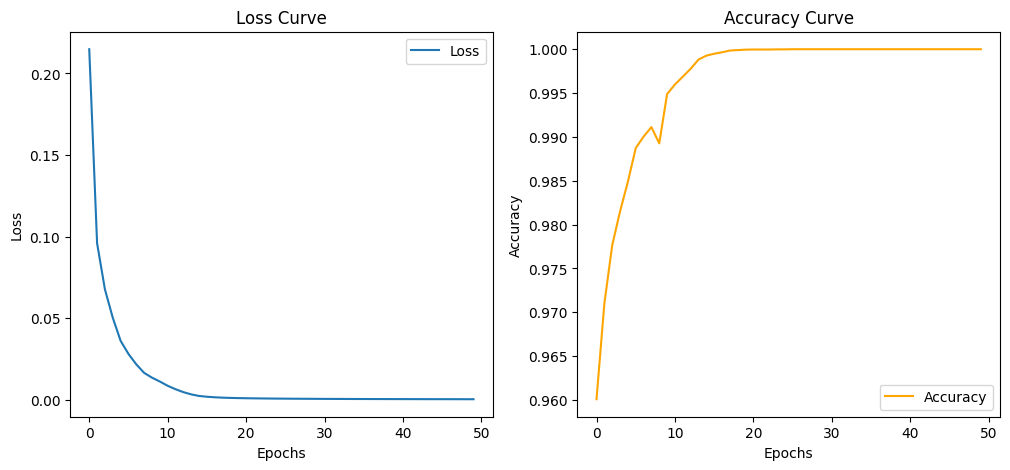

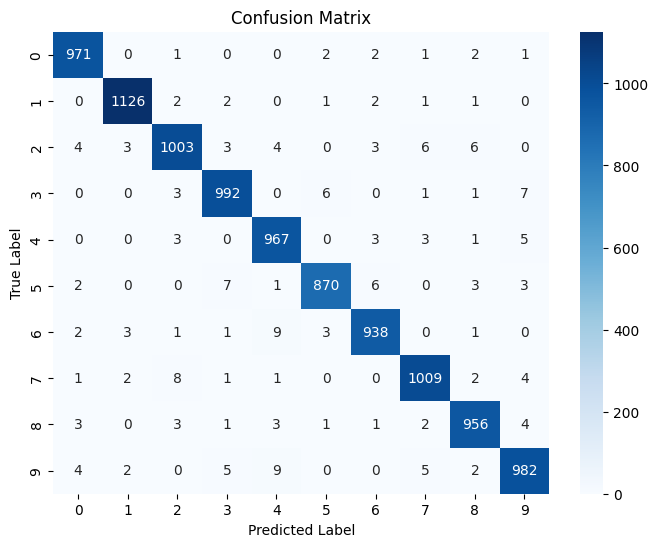

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape input data (flattening 28x28 images into 784-dimensional vectors)
x_train = x_train.reshape(-1, 784).astype(np.float32)
x_test = x_test.reshape(-1, 784).astype(np.float32)

# Convert labels to one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Define network parameters
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.1
epochs = 50
batch_size = 10

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([input_size, hidden_size], stddev=0.1))
b1 = tf.Variable(tf.zeros([hidden_size]))
W2 = tf.Variable(tf.random.normal([hidden_size, output_size], stddev=0.1))
b2 = tf.Variable(tf.zeros([output_size]))

def forward_pass(x):
    hidden = tf.nn.relu(tf.matmul(x, W1) + b1)
    output = tf.matmul(hidden, W2) + b2
    return output

def compute_loss(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        logits = forward_pass(x_batch)
        loss = compute_loss(logits, y_batch)
    gradients = tape.gradient(loss, [W1, b1, W2, b2])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
    return loss

# Training loop
num_batches = x_train.shape[0] // batch_size
loss_curve = []
accuracy_curve = []
start_time = time.time()

for epoch in range(epochs):
    avg_loss = 0
    for i in range(num_batches):
        batch_x = x_train[i * batch_size:(i + 1) * batch_size]
        batch_y = y_train[i * batch_size:(i + 1) * batch_size]
        loss = train_step(batch_x, batch_y)
        avg_loss += loss / num_batches
    loss_curve.append(avg_loss.numpy())
    
    logits_train = forward_pass(x_train)
    predictions_train = tf.argmax(logits_train, axis=1)
    y_train_true = tf.argmax(y_train, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions_train, y_train_true), tf.float32))
    accuracy_curve.append(accuracy.numpy())
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy.numpy() * 100:.2f}%")

end_time = time.time()
training_time = end_time - start_time

# Evaluate model
logits_test = forward_pass(x_test)
predictions = tf.argmax(logits_test, axis=1)
y_true = tf.argmax(y_test, axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_true), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_curve, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_curve, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape input data (flattening 28x28 images into 784-dimensional vectors)
x_train = x_train.reshape(-1, 784).astype(np.float32)
x_test = x_test.reshape(-1, 784).astype(np.float32)

# Convert labels to one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Define network parameters
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.1
epochs = 50
batch_size = 10

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([input_size, hidden_size], stddev=0.1))
b1 = tf.Variable(tf.zeros([hidden_size]))
W2 = tf.Variable(tf.random.normal([hidden_size, output_size], stddev=0.1))
b2 = tf.Variable(tf.zeros([output_size]))

def forward_pass(x):
    hidden = tf.nn.relu(tf.matmul(x, W1) + b1)
    output = tf.matmul(hidden, W2) + b2
    return output

def compute_loss(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        logits = forward_pass(x_batch)
        loss = compute_loss(logits, y_batch)
    gradients = tape.gradient(loss, [W1, b1, W2, b2])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
    return loss

# Training loop
num_batches = x_train.shape[0] // batch_size
loss_curve = []
accuracy_curve = []
start_time = time.time()

for epoch in range(epochs):
    avg_loss = 0
    for i in range(num_batches):
        batch_x = x_train[i * batch_size:(i + 1) * batch_size]
        batch_y = y_train[i * batch_size:(i + 1) * batch_size]
        loss = train_step(batch_x, batch_y)
        avg_loss += loss / num_batches
    loss_curve.append(avg_loss.numpy())
    
    logits_train = forward_pass(x_train)
    predictions_train = tf.argmax(logits_train, axis=1)
    y_train_true = tf.argmax(y_train, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions_train, y_train_true), tf.float32))
    accuracy_curve.append(accuracy.numpy())
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy.numpy() * 100:.2f}%")

end_time = time.time()
training_time = end_time - start_time

# Evaluate model
logits_test = forward_pass(x_test)
predictions = tf.argmax(logits_test, axis=1)
y_true = tf.argmax(y_test, axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_true), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_curve, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_curve, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Epoch 1, Loss: 0.2136, Accuracy: 96.10%
Epoch 2, Loss: 0.0953, Accuracy: 97.28%
Epoch 3, Loss: 0.0647, Accuracy: 98.03%
Epoch 4, Loss: 0.0473, Accuracy: 98.35%
Epoch 5, Loss: 0.0347, Accuracy: 98.81%
Epoch 6, Loss: 0.0265, Accuracy: 99.12%
Epoch 7, Loss: 0.0191, Accuracy: 99.24%
Epoch 8, Loss: 0.0146, Accuracy: 99.18%
Epoch 9, Loss: 0.0121, Accuracy: 99.37%
Epoch 10, Loss: 0.0087, Accuracy: 99.58%
Epoch 11, Loss: 0.0064, Accuracy: 99.58%
Epoch 12, Loss: 0.0050, Accuracy: 99.73%
Epoch 13, Loss: 0.0034, Accuracy: 99.85%
Epoch 14, Loss: 0.0027, Accuracy: 99.90%
Epoch 15, Loss: 0.0020, Accuracy: 99.94%
Epoch 16, Loss: 0.0016, Accuracy: 99.95%
Epoch 17, Loss: 0.0013, Accuracy: 99.97%
Epoch 18, Loss: 0.0012, Accuracy: 99.98%
Epoch 19, Loss: 0.0010, Accuracy: 99.98%
Epoch 20, Loss: 0.0009, Accuracy: 99.99%
Epoch 21, Loss: 0.0009, Accuracy: 99.99%
Epoch 22, Loss: 0.0008, Accuracy: 100.00%
Epoch 23, Loss: 0.0007, Accuracy: 100.00%
Epoch 24, Loss: 0.0007, Accuracy: 100.00%
Epoch 25, Loss: 0.0006